In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

Import Data per scenario (Train:30, Dev: 5, Test: 5)

In [2]:
df_train = pd.read_json("/home/sumire/discourse_context_mt/data/AMI-Meeting-Parallel-Corpus-master/train.json")
df_train

,id,original_language,conversation
0,EN2001b,en,"[{'no': 1, 'en_speaker': 'A', 'ja_sentence': '..."
1,EN2005a,en,"[{'no': 1, 'en_speaker': 'B', 'ja_sentence': '..."
2,EN2009d,en,"[{'no': 1, 'en_speaker': 'B', 'ja_sentence': '..."
3,ES2004c,en,"[{'no': 1, 'en_speaker': 'B', 'ja_sentence': '..."
4,ES2007d,en,"[{'no': 1, 'en_speaker': 'D', 'ja_sentence': '..."
5,ES2008b,en,"[{'no': 1, 'en_speaker': 'A', 'ja_sentence': '..."
6,ES2011b,en,"[{'no': 1, 'en_speaker': 'D', 'ja_sentence': '..."
7,ES2012c,en,"[{'no': 1, 'en_speaker': 'A', 'ja_sentence': '..."
8,ES2013a,en,"[{'no': 1, 'en_speaker': 'D', 'ja_sentence': '..."
9,ES2016c,en,"[{'no': 1, 'en_speaker': 'A', 'ja_sentence': '..."


In [3]:
df_dev = pd.read_json("/home/sumire/discourse_context_mt/data/AMI-Meeting-Parallel-Corpus-master/dev.json")
df_dev

,id,original_language,conversation
0,IS1004a,en,"[{'no': 1, 'en_speaker': 'A', 'ja_sentence': '..."
1,ES2008a,en,"[{'no': 1, 'en_speaker': 'D', 'ja_sentence': '..."
2,TS3004a,en,"[{'no': 1, 'en_speaker': 'B', 'ja_sentence': '..."
3,EN2003a,en,"[{'no': 1, 'en_speaker': 'C', 'ja_sentence': '..."
4,IB4002,en,"[{'no': 1, 'en_speaker': 'D', 'ja_sentence': '..."


In [4]:
df_test = pd.read_json("/home/sumire/discourse_context_mt/data/AMI-Meeting-Parallel-Corpus-master/test.json")
df_test

,id,original_language,conversation
0,ES2003a,en,"[{'no': 1, 'en_speaker': 'B', 'ja_sentence': '..."
1,IS1008c,en,"[{'no': 1, 'en_speaker': 'A', 'ja_sentence': '..."
2,IN1009,en,"[{'no': 1, 'en_speaker': 'B', 'ja_sentence': '..."
3,TS3006a,en,"[{'no': 1, 'en_speaker': 'B', 'ja_sentence': '..."
4,IB4005,en,"[{'no': 1, 'en_speaker': 'A', 'ja_sentence': '..."


Document-level data split

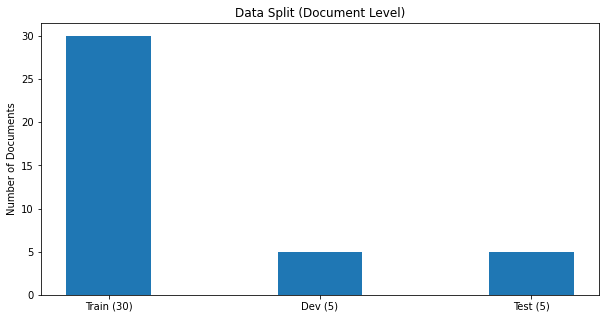

In [5]:
data_doc = {f'Train ({len(df_train.index)})':len(df_train.index), f'Dev ({len(df_dev.index)})':len(df_dev.index), f'Test ({len(df_test.index)})':len(df_test.index)}
x = list(data_doc.keys())
y = list(data_doc.values())

fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(x, y,width = 0.4)
 
plt.ylabel("Number of Documents")
plt.title("Data Split (Document Level)")
plt.show()

 Inside the conversation column, there are several sentences both in en and ja, with eac sentence no. and speaker info ('en_speaker').  

In [6]:
for sent in df_train['conversation'].iloc[25]:
    print (sent['ja_sentence'])
print (len(df_train['conversation'].iloc[25]))

改めまして、おはようございます。
1つ質問があります。
はい。
番号を選びますか？
送信。
提出。
ええ、ええ、ええ、ええ。
用意はいいですか？
うむ。
ええ。
はい。
いいでしょう。
では。
ここで何が分かるかやってみましょう。
いいでしょう。
改めまして、皆さんを温かくお迎えします。
えっと、ここでは、すでに、えー、機能設計のミーティングが行われていますね。
えっと、そしてこれは、私たちがこれから行うことです。
開会、これは今行っていますね。えっと、特記事項は、私はプロジェクト マネージャですが、ミーティングでは秘書でもあります。ということで、前回のミーティングで行ったように議事録を作ります。
そして、えー、私はまた、これらをできるだけ早くプロジェクト フォルダに入れます。それで、あなた方はそれらを見て、話し合ったことを見直すことができます。
えっと、もし私が正しければ、3つプレゼンがありますね。皆さん1つづつ用意をされましたか？
はい。
いいですね。
そして、えっと、新しいプロジェクト要件にも目を通します。えっと、もしそれについてあなた方がまだ聞いていないようでしたら。
それから、もちろん、私たちはリモコンの機能を決めなければいけません。それから、もう少し時間があります。40分です。
しかし、それは必要になると思います。
えっと、ええっと、誰が最初にプレゼンを行うか、私は知りません。
私が先にやります。
では。
ええ。
私が先にやります。ええ。
えーと。
お先にどうぞ。いいですよ。
えーと、ユーザについて、私が先にやりましょうか？
えーと、みなさんプレゼンはすでに用意してありますから、あなたは調整できます。
えーと、そうですね。問題ありません。
順序がありますか？
私が把握していないので、1つ質問があります。えー、あなたの名前ですが、デニ、それはIEかEIEですよね。
EIEです。
それで。
はい？
いいでしょう、えっと、いいでしょう。えっと、私はリモコンの動作設計について説明をしたかったのです。
ありがとうございます。
もしそれらの1つを、えー、設計したいのであれば、とても役に立つと思います。
えっと、えーと、それで、それは基本的に、えー、私がちょっとこの概要に、えー、記した通りに、えー、動作します。
えー、ボタンを押すと、えっと、それは例えば、えー、あなた

Checking min/max/average length of the sentence

In [9]:
from transformers import MBart50Tokenizer, MBartConfig

source_lang="en"
target_lang="ja"
model_checkpoint = "facebook/mbart-large-50-many-to-many-mmt"
configuration = MBartConfig()
tokenizer = MBart50Tokenizer.from_pretrained(model_checkpoint, src_lang=f"{source_lang}_XX", tgt_lang=f"{target_lang}_XX")


ja_sentence_list = []
en_sentence_list = []

for conversation in df_train['conversation']:
    #print (conversation)
    #convers_count += 1
    #sentence_count = 0
    #print ("convers_num: ", convers_count)
    for sentence in conversation:
        #print ("sentence_num: ", sentence_count)
        #print (sentence['ja_sentence'])
        ja_sentence_list.append(sentence['ja_sentence'])
        #print (sentence['en_sentence'])
        en_sentence_list.append(sentence['en_sentence'])

tokenized_en = tokenizer(en_sentence_list, text_target=ja_sentence_list)["input_ids"]
tokenized_ja =  tokenizer(en_sentence_list, text_target=ja_sentence_list)["labels"]

print (len(tokenized_en), len(tokenized_ja))

en_token_num_list = []
ja_token_num_list = []
for sentence in tokenized_en:
    en_token_num_list.append(len(sentence))

for sentence in tokenized_ja:
    ja_token_num_list.append((len(sentence)))

"""
print ('ja_sentence')        
print (f'max length: {max(len(x) for x in ja_sentence_list)}\n (Index, sentence): {max(enumerate(ja_sentence_list), key=lambda x: len(x[1]))}')
print (f'min length: {min(len(x) for x in ja_sentence_list)}\n (Index, sentence): {min(enumerate(ja_sentence_list), key=lambda x: len(x[1]))}')
print (f'avrage length: {(sum(len(x) for x in ja_sentence_list)) / len(ja_sentence_list)}')


print ()
print ('en_sentence')
print (f'max length: {max(len(x) for x in en_sentence_list)}\n (Index, sentence): {max(enumerate(en_sentence_list), key=lambda x: len(x[1]))}')
print (f'min length: {min(len(x) for x in en_sentence_list)}\n (Index, sentence): {min(enumerate(en_sentence_list), key=lambda x: len(x[1]))}')
print (f'avrage length: {(sum(len(x) for x in en_sentence_list)) / len(en_sentence_list)}')
"""


20000 20000
[10, 4, 4, 12, 16, 6, 4, 6, 4, 4, 7, 5, 40, 31, 15, 4, 7, 4, 4, 31, 4, 4, 39, 11, 92, 29, 15, 69, 5, 27, 4, 4, 32, 10, 21, 4, 16, 4, 4, 9, 24, 8, 8, 4, 26, 5, 14, 21, 16, 16, 5, 16, 17, 15, 29, 9, 23, 4, 4, 10, 30, 22, 19, 6, 37, 12, 28, 19, 10, 5, 12, 18, 5, 4, 25, 5, 31, 4, 11, 4, 14, 33, 48, 4, 7, 27, 4, 33, 5, 30, 32, 12, 6, 20, 26, 4, 28, 7, 6, 34] [9, 6, 6, 12, 14, 8, 6, 7, 5, 6, 9, 8, 47, 36, 16, 6, 6, 6, 5, 27, 5, 5, 30, 10, 87, 20, 14, 70, 8, 28, 6, 6, 31, 11, 14, 5, 21, 6, 6, 8, 37, 8, 8, 6, 31, 6, 13, 13, 17, 16, 6, 15, 12, 13, 24, 10, 19, 6, 5, 9, 29, 17, 22, 8, 41, 14, 27, 12, 11, 6, 12, 17, 9, 6, 19, 8, 32, 6, 10, 6, 10, 36, 35, 6, 6, 28, 6, 36, 6, 25, 33, 14, 9, 16, 17, 5, 32, 10, 5, 31]


NameError: name 'ja_token_nu' is not defined

In [12]:
print (en_token_num_list[:100], ja_token_num_list[:100])

print ("Max")
print ("En: max num of tokens in a sentence", max(en_token_num_list), "\nJa: max num of tokens in a sentence", max(ja_token_num_list))
print ("")
print ("Avg")
print ("En: avg num of tokens in a sentence", max(en_token_num_list)/len(en_sentence_list), "\nJa: avg num of tokens in a sentence", max(ja_token_num_list)/len(ja_sentence_list))
print ("")
print ("Min")
print ("En: min num of tokens in a sentence", min(en_token_num_list), "\nJa: min num of tokens in a sentence", min(ja_token_num_list))


[10, 4, 4, 12, 16, 6, 4, 6, 4, 4, 7, 5, 40, 31, 15, 4, 7, 4, 4, 31, 4, 4, 39, 11, 92, 29, 15, 69, 5, 27, 4, 4, 32, 10, 21, 4, 16, 4, 4, 9, 24, 8, 8, 4, 26, 5, 14, 21, 16, 16, 5, 16, 17, 15, 29, 9, 23, 4, 4, 10, 30, 22, 19, 6, 37, 12, 28, 19, 10, 5, 12, 18, 5, 4, 25, 5, 31, 4, 11, 4, 14, 33, 48, 4, 7, 27, 4, 33, 5, 30, 32, 12, 6, 20, 26, 4, 28, 7, 6, 34] [9, 6, 6, 12, 14, 8, 6, 7, 5, 6, 9, 8, 47, 36, 16, 6, 6, 6, 5, 27, 5, 5, 30, 10, 87, 20, 14, 70, 8, 28, 6, 6, 31, 11, 14, 5, 21, 6, 6, 8, 37, 8, 8, 6, 31, 6, 13, 13, 17, 16, 6, 15, 12, 13, 24, 10, 19, 6, 5, 9, 29, 17, 22, 8, 41, 14, 27, 12, 11, 6, 12, 17, 9, 6, 19, 8, 32, 6, 10, 6, 10, 36, 35, 6, 6, 28, 6, 36, 6, 25, 33, 14, 9, 16, 17, 5, 32, 10, 5, 31]
Max
En: max num of tokens in a sentence 182 
Ja: max num of tokens in a sentence 160

Avg
En: avg num of tokens in a sentence 0.0091 
Ja: avg num of tokens in a sentence 0.008

Min
En: min num of tokens in a sentence 4 
Ja: min num of tokens in a sentence 3


In [35]:
# How many sentences are only with "-" or "." ?
print ('the number of "-": ', ja_sentence_list.count('-'))
print ('the number of ".": ', en_sentence_list.count('.'))
print ()
import collections
c_ja = collections.Counter(ja_sentence_list)
c_en = collections.Counter(en_sentence_list)
print('Duplicates in Japanese: ', c_ja.most_common()[:20])
print ()
print ('Duplicates in English: ',c_en.most_common()[:20])

the number of "-":  7
the number of ".":  7

Duplicates in Japanese:  [('ええ。', 1406), ('はい。', 896), ('そうですね。', 833), ('分かりました。', 529), ('ふむ。', 284), ('うーん。', 243), ('ふむふむ。', 127), ('うん。', 108), ('ああ。', 90), ('うむ。', 90), ('ええ、ええ。', 82), ('その通りです。', 82), ('うんうん。', 80), ('いいでしょう。', 79), ('なるほど。', 69), ('いいえ。', 54), ('んー。', 49), ('あー。', 43), ('いいですね。', 40), ('そうですか。', 40)]

Duplicates in English:  [('Yeah.', 1929), ('Mm-hmm.', 917), ('Okay.', 911), ('Mm.', 452), ('Right.', 155), ('Hmm.', 148), ('Yes.', 137), ('No.', 129), ('Yep.', 116), ('Yeah, yeah.', 98), ('Oh.', 80), ('Uh-huh.', 61), ('Um.', 59), ("'Kay.", 55), ('Alright.', 52), ('Uh.', 51), ('Yeah?', 31), ('Yeah, okay.', 29), ('Oh yeah.', 28), ('Thank you.', 26)]


In [13]:
def check_doc_len(data):

    doc_len_list = []
    doc_len=0
    for doc in data["conversation"]:
        doc_len_list.append(doc_len)
        doc_len = 0
        for sent in doc:
            doc_len += 1       

    #print("The number of document:", len(doc_len_list))
    print("Average of the num of sentences in document ():", sum(doc_len_list)/len(doc_len_list))
    print("Maximum of the num of sentences in document:", max(doc_len_list))
    print("Minimum of the num of sentence in document:", min(doc_len_list))

print ("Train_data")
train_doc_len = check_doc_len(df_train)
print()
print ("val_data")
dev_doc_len = check_doc_len(df_dev)
print()
print ("Test_data")
test_doc_len = check_doc_len(df_test)


Train_data
Average of the num of sentences in document (): 643.0
Maximum of the num of sentences in document: 2094
Minimum of the num of sentence in document: 0

val_data
Average of the num of sentences in document (): 275.2
Maximum of the num of sentences in document: 623
Minimum of the num of sentence in document: 0

Test_data
Average of the num of sentences in document (): 256.2
Maximum of the num of sentences in document: 527
Minimum of the num of sentence in document: 0


Missing Value Check

In [22]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 30 non-null     object
 1   original_language  30 non-null     object
 2   conversation       30 non-null     object
dtypes: object(3)
memory usage: 848.0+ bytes


In [24]:
df_dev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5 non-null      object
 1   original_language  5 non-null      object
 2   conversation       5 non-null      object
dtypes: object(3)
memory usage: 248.0+ bytes


In [25]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5 non-null      object
 1   original_language  5 non-null      object
 2   conversation       5 non-null      object
dtypes: object(3)
memory usage: 248.0+ bytes


Check unique values or duplicates etc
- Original language is always English 

In [26]:
df_train.describe()

,id,original_language,conversation
count,30,30,30
unique,30,1,30
top,EN2001b,en,"[{'no': 1, 'en_speaker': 'A', 'ja_sentence': '..."
freq,1,30,1


In [27]:
df_dev.describe()

,id,original_language,conversation
count,5,5,5
unique,5,1,5
top,IS1004a,en,"[{'no': 1, 'en_speaker': 'A', 'ja_sentence': '..."
freq,1,5,1


In [28]:
df_test.describe()

,id,original_language,conversation
count,5,5,5
unique,5,1,5
top,ES2003a,en,"[{'no': 1, 'en_speaker': 'B', 'ja_sentence': '..."
freq,1,5,1


Count Sentences 

In [25]:
# Count all sentences in entire dataset

tag_lists = ['phone call', 'meeting', 'face-to-face conversation', 'general chatting', 'presentation', 'training']

def count_sents(data):
    
    all_sents = 0
    
    for i in range(len(data)):
        sents_in_scenario = len(data['conversation'].iloc[i])
        all_sents += sents_in_scenario
             
                
    return all_sents 

print ("Sentence-level Data split")
print (f'Train: {count_sents(df_train)}\nDev  : {count_sents(df_dev)}\nTest : {count_sents(df_test)}')

Sentence-level Data split
Train: 20000
Dev  : 2000
Test : 2000


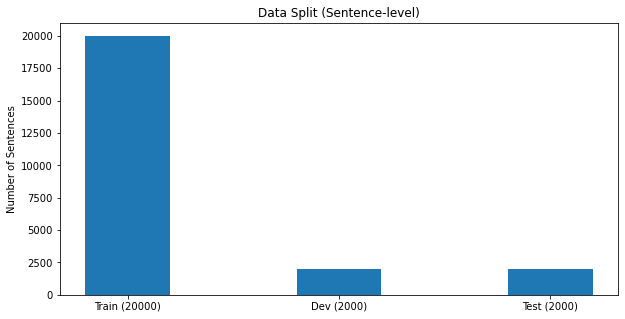

In [26]:
data_sent = {f'Train ({count_sents(df_train)})':count_sents(df_train), f'Dev ({count_sents(df_dev)})': count_sents(df_dev), f'Test ({count_sents(df_test)})':count_sents(df_test)}
x = list(data_sent.keys())
y = list(data_sent.values())

fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(x, y,width = 0.4)
 
plt.ylabel("Number of Sentences")
plt.title("Data Split (Sentence-level)")
plt.show()